In [ ]:
#LINEAR REGRESSION FROM SCRATCH

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Y= AP
#X= V,RH, OTHERS COLUMNS => TAKE ONLY COLUMNS = LINEAR REGRESSION = ONE VAR ALGO
#PREDICTION OF Y

In [ ]:
# Importing the data
data_df = pd.read_csv('ccp.csv')
data_df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
# Extracting features (X) and target variable (y)
x = data_df['AP'].values  # Using 'AP' as a single feature for simplicity
y = data_df['PE'].values

#PURPOSE - PREDICTED PE ATTRIBUTE FROM MY GIVEN DATA BY IMPLEMENTING LR
# Y=PE
# X= AP
#ONE VAR

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Adding a column of ones for the intercept term
x_train = np.vstack((np.ones_like(x_train), x_train)).T
x_test = np.vstack((np.ones_like(x_test), x_test)).T


In [ ]:
  #TILL NOW WE WERE REFINING DATA  { SEPARATING VARIABLES, MAKING DATA ORGANIZED}

In [ ]:
# Function to perform linear regression
#WE ARE WRITING LINEAR REGRESSION ALGORITHM

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

In [ ]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)


In [ ]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 246.0731485713301
Root Mean Squared Error (RMSE): 15.686718859319502
Mean Absolute Error (MAE): 13.565326038087404
R-squared: 0.9995506989261739


In [ ]:
#ANALYSIS OF ACTUAL VS PREDICTED VALUES

In [ ]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df)

      Actual Values  Predicted Values  Difference (Actual - Predicted)
0            433.27        451.030995                       -17.760995
1            438.16        452.475182                       -14.315182
2            458.42        459.736486                        -1.316486
3            480.82        460.516886                        20.303114
4            441.41        456.085652                       -14.675652
...             ...               ...                              ...
1909         456.70        453.017874                         3.682126
1910         438.04        451.784484                       -13.744484
1911         467.80        453.645782                        14.154218
1912         437.14        452.125348                       -14.985348
1913         456.78        455.430834                         1.349166

[1914 rows x 3 columns]


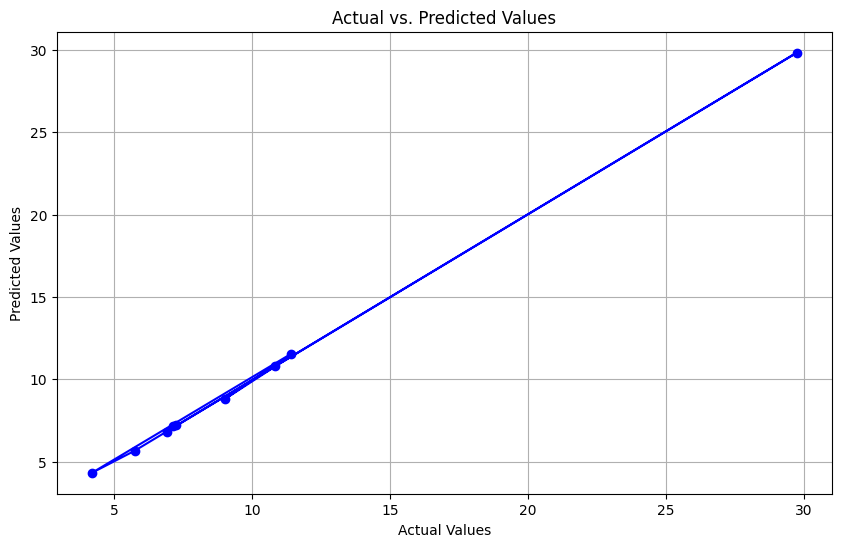

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame
data = {
    'Actual Values': [10.84, 9.01, 11.41, 4.20, 5.75, 29.75, 6.90, 7.15, 7.23],
    'Predicted Values': [10.78, 8.80, 11.54, 4.33, 5.67, 29.82, 6.83, 7.19, 7.20]
}

df = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Values'], df['Predicted Values'], marker='o', linestyle='-', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)

# Display the plot
plt.show()
